In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [13]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [14]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [16]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


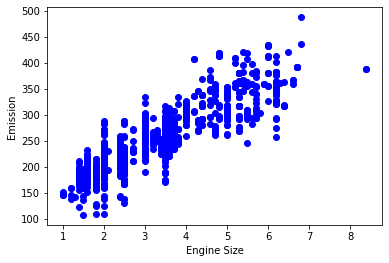

In [17]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
from sklearn import linear_model

In [21]:
train_x = np.asanyarray(train[['ENGINESIZE']])

In [22]:
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [23]:
test_x = np.asanyarray(test[['ENGINESIZE']])

In [24]:
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [26]:
poly = PolynomialFeatures(degree=2)

In [27]:
train_x_poly = poly.fit_transform(train_x)

In [29]:
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [30]:
clf = linear_model.LinearRegression()

In [31]:
train_y = clf.fit(train_x_poly, train_y)

In [32]:
print ('Coefficients : ', train_y.coef_)

Coefficients :  [[ 0.         50.42756997 -1.53386919]]


In [33]:
print ('Intercept : ', train_y.intercept_)

Intercept :  [107.42181689]


Text(0, 0.5, 'Emissions')

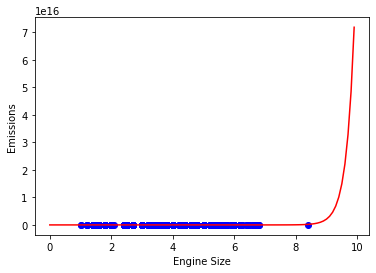

In [34]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]**xx + clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [35]:
from sklearn.metrics import r2_score

In [36]:
test_x_poly = poly.fit_transform(test_x)

In [37]:
test_y_ = clf.predict(test_x_poly)

In [39]:
print('Mean Absolute Error : %.2f' %np.mean(np.absolute(test_y_ - test_y)))

Mean Absolute Error : 24.57


In [40]:
print('Residual sum of sqaures : %.2f' %np.mean((test_y_ - test_y)**2))

Residual sum of sqaures : 1086.66


In [41]:
print('R2 Score : %.2f' %r2_score(test_y_, test_y))

R2 Score : 0.66
